# Tarea de evaluación - Estadística con Python

### 1 .Elección de datos y breve descripción de su naturaleza

El conjunto de datos seleccionado presenta un registro de características de propiedades residenciales ubicadas en el área periferica de Londres, Reino Unido, con un enfoque particular en el mercado inmobiliario del año 2023. Cada registro incluye información detallada sobre diversos aspectos de las viviendas, desde dimensiones físicas hasta comodidades y características estructurales.

Estos datos proporcionan una visión integral del mercado inmobiliario, abarcando desde propiedades unifamiliares hasta condominios de lujo y edificios de apartamentos. Además de las métricas estándar como el precio y el área, se registran detalles como el número de dormitorios y baños, la presencia de características especiales como sótanos y habitaciones de invitados, así como servicios adicionales como calefacción de agua caliente, aire acondicionado y espacios de estacionamiento.

#### Características

- **price:** El precio de la propiedad.
- **area:** El área total de la propiedad en pies cuadrados.
- **bedrooms:** El número de dormitorios en la propiedad.
- **bathrooms:** El número de baños en la propiedad.
- **stories:** El número de pisos (plantas) en la propiedad.
- **mainroad:** Indica si la propiedad está ubicada en una carretera principal (binario: sí/no).
- **guestroom:** Indica si la propiedad tiene una habitación de invitados (binario: sí/no).
- **basement:** Indica si la propiedad tiene un sótano (binario: sí/no).
- **hotwaterheating:** Indica si la propiedad tiene calefacción de agua caliente (binario: sí/no).
- **airconditioning:** Indica si la propiedad tiene aire acondicionado (binario: sí/no).
- **parking:** El número de espacios de estacionamiento disponibles con la propiedad.
- **prefarea:** Indica si la propiedad está en un área preferida (binario: sí/no).
- **furnishingstatus:** El estado de amueblado de la propiedad (por ejemplo, amueblado, semi-amueblado, sin amueblar).


### 2 .Descriptiva univariante y bivariante de los datos teniendo en cuenta su tipo

1. Variables numéricas:
   - Continuas:
     - price
     - area
   - Discretas:
     - bedrooms
     - bathrooms
     - stories
     - parking

2. Variables categóricas (binarias):
      - mainroad
      - guestroom
      - basement
      - hotwaterheating
      - airconditioning
      - prefarea

3. Variable categórica (con múltiples categorías):
      - furnishingstatus






- El dataset consta de **545 registros** con un precio promedio de alrededor de $476,672.90 libras y una superficie media de  140 metros cuadrados, y aproximadamente 3 dormitorios por propiedad.

- Las **distribuciones** de las variables continuas tanto de **precio** como de **area** muestran una **asimetria lateral izquierda** con cola hacia la derecha indicando que la mayor cantidad de datos se ubican dentro de los valores mas bajos del rango.

- El 50% de las propiedades tienen un precio de hasta \$434,000, mientras que el 25% tienen un precio inferior a \$343,000 y el 25% restante tienen precios superiores a \$574,000.

- En promedio, las propiedades tienen alrededor de 1.8 pisos y 0.69 lugares de **estacionamiento**, siendo la mayoría de una o dos plantas y con estacionamiento para un solo automóvil.





In [46]:
import pandas as pd

path = 'Housing_Price_Data.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+05,143.070591,2.965138,1.286239,1.805505,0.693578
std,1.870440e+05,60.281695,0.738064,0.502470,0.867492,0.861586
min,1.750000e+05,45.833333,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+05,100.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+05,127.777778,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+05,176.666667,3.000000,2.000000,2.000000,1.000000
max,1.330000e+06,450.000000,6.000000,4.000000,4.000000,3.000000


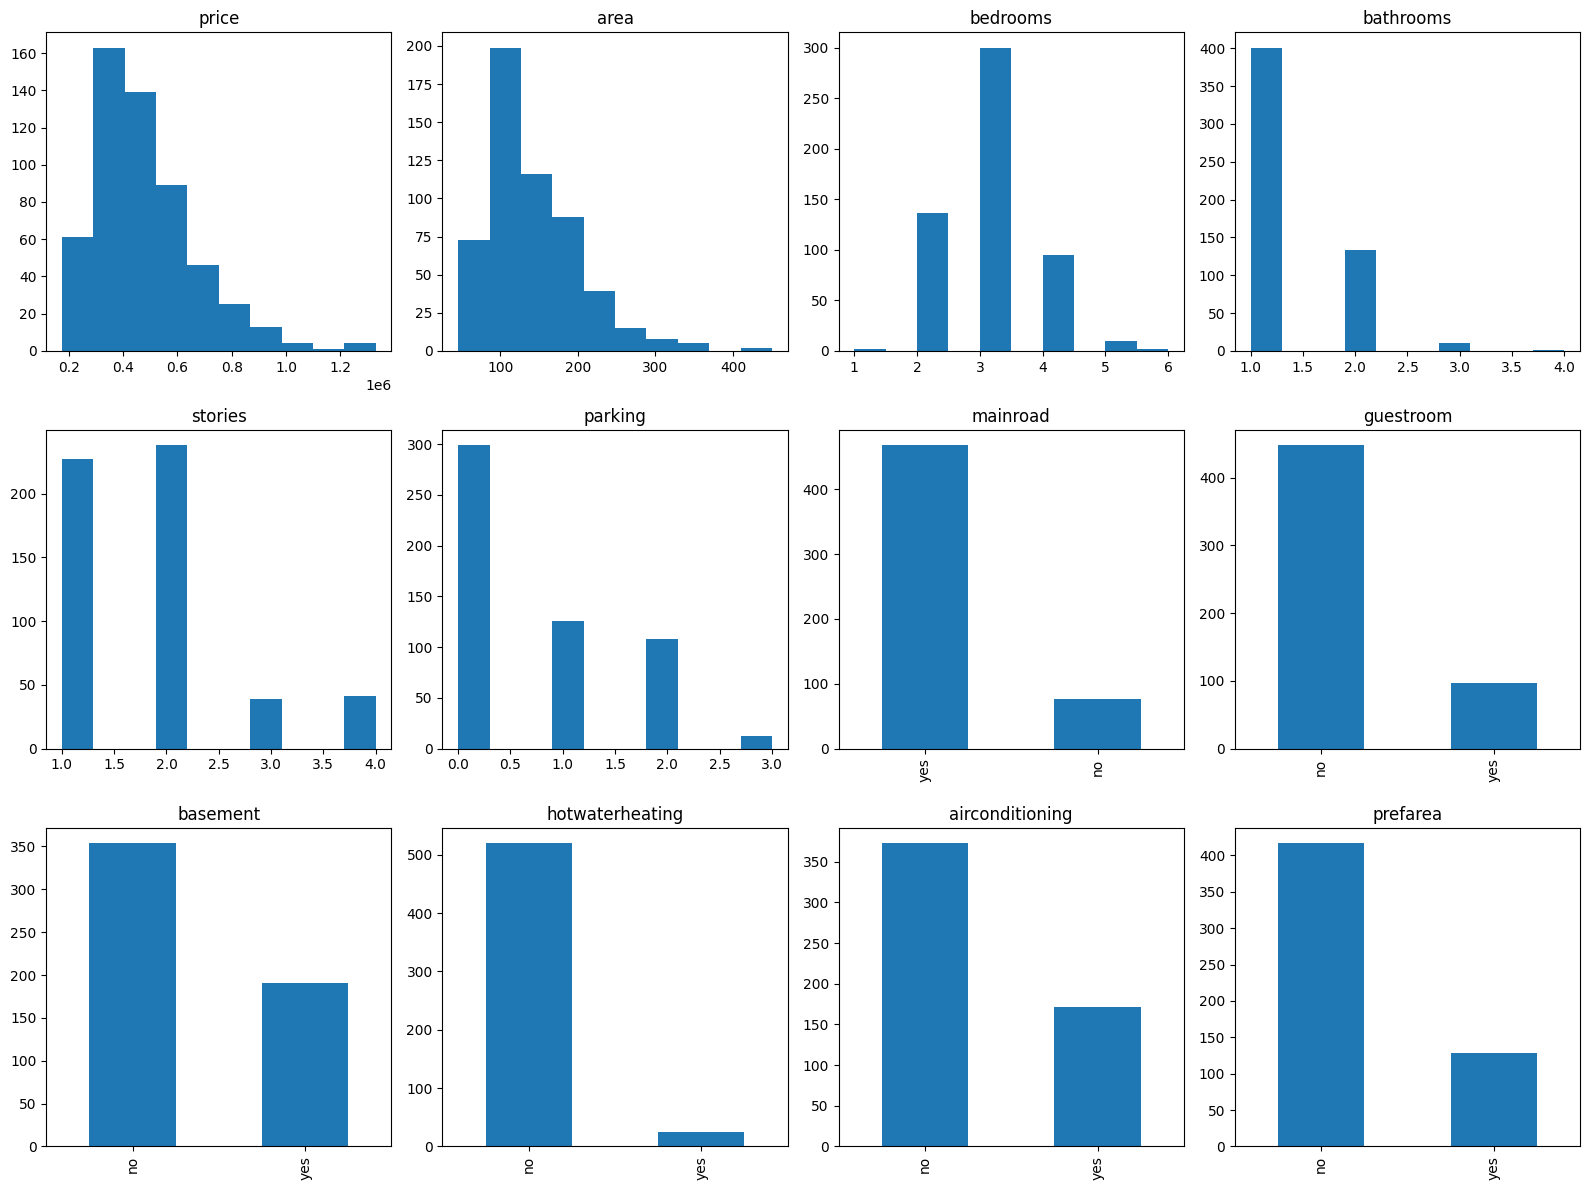

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Variables a graficar
variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
             'mainroad', 'guestroom', 'basement', 'hotwaterheating',
             'airconditioning', 'prefarea']

# Subplot
for i, var in enumerate(variables):
    row = i // 4  # Fila del subplot
    col = i % 4   # Columna del subplot

    # Histograma 
    if var in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
        axes[row, col].hist(df[var])
        axes[row, col].set_title(var)
    # Gráfico de barras
    else:
        df[var].value_counts().plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(var)

plt.tight_layout()
plt.show()


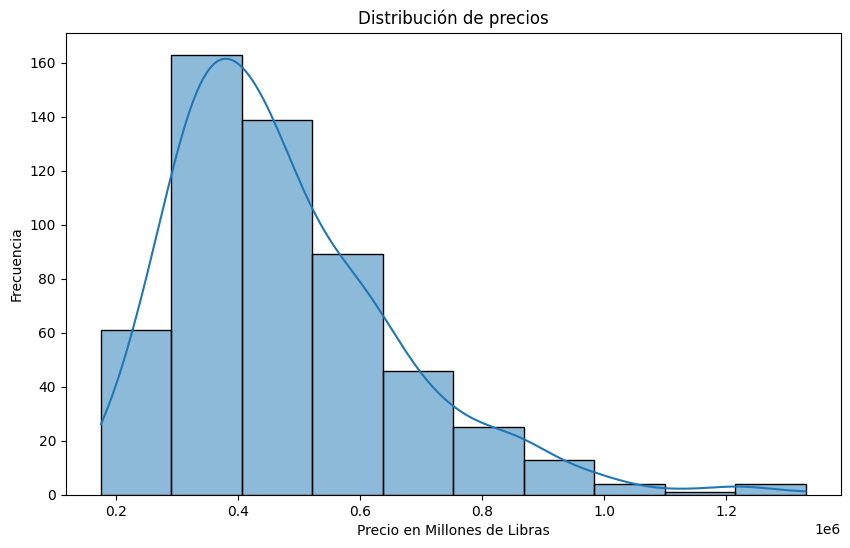

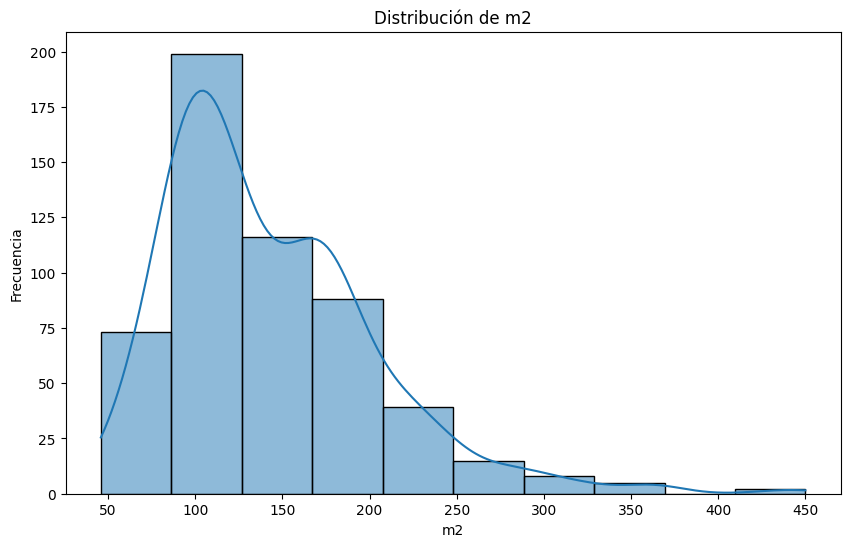

In [6]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['price'] , bins=10, kde=True)  #
plt.title('Distribución de precios')
plt.xlabel('Precio en Millones de Libras')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['area'] , bins=10, kde=True)  #
plt.title('Distribución de m2')
plt.xlabel('m2')
plt.ylabel('Frecuencia')
plt.show()




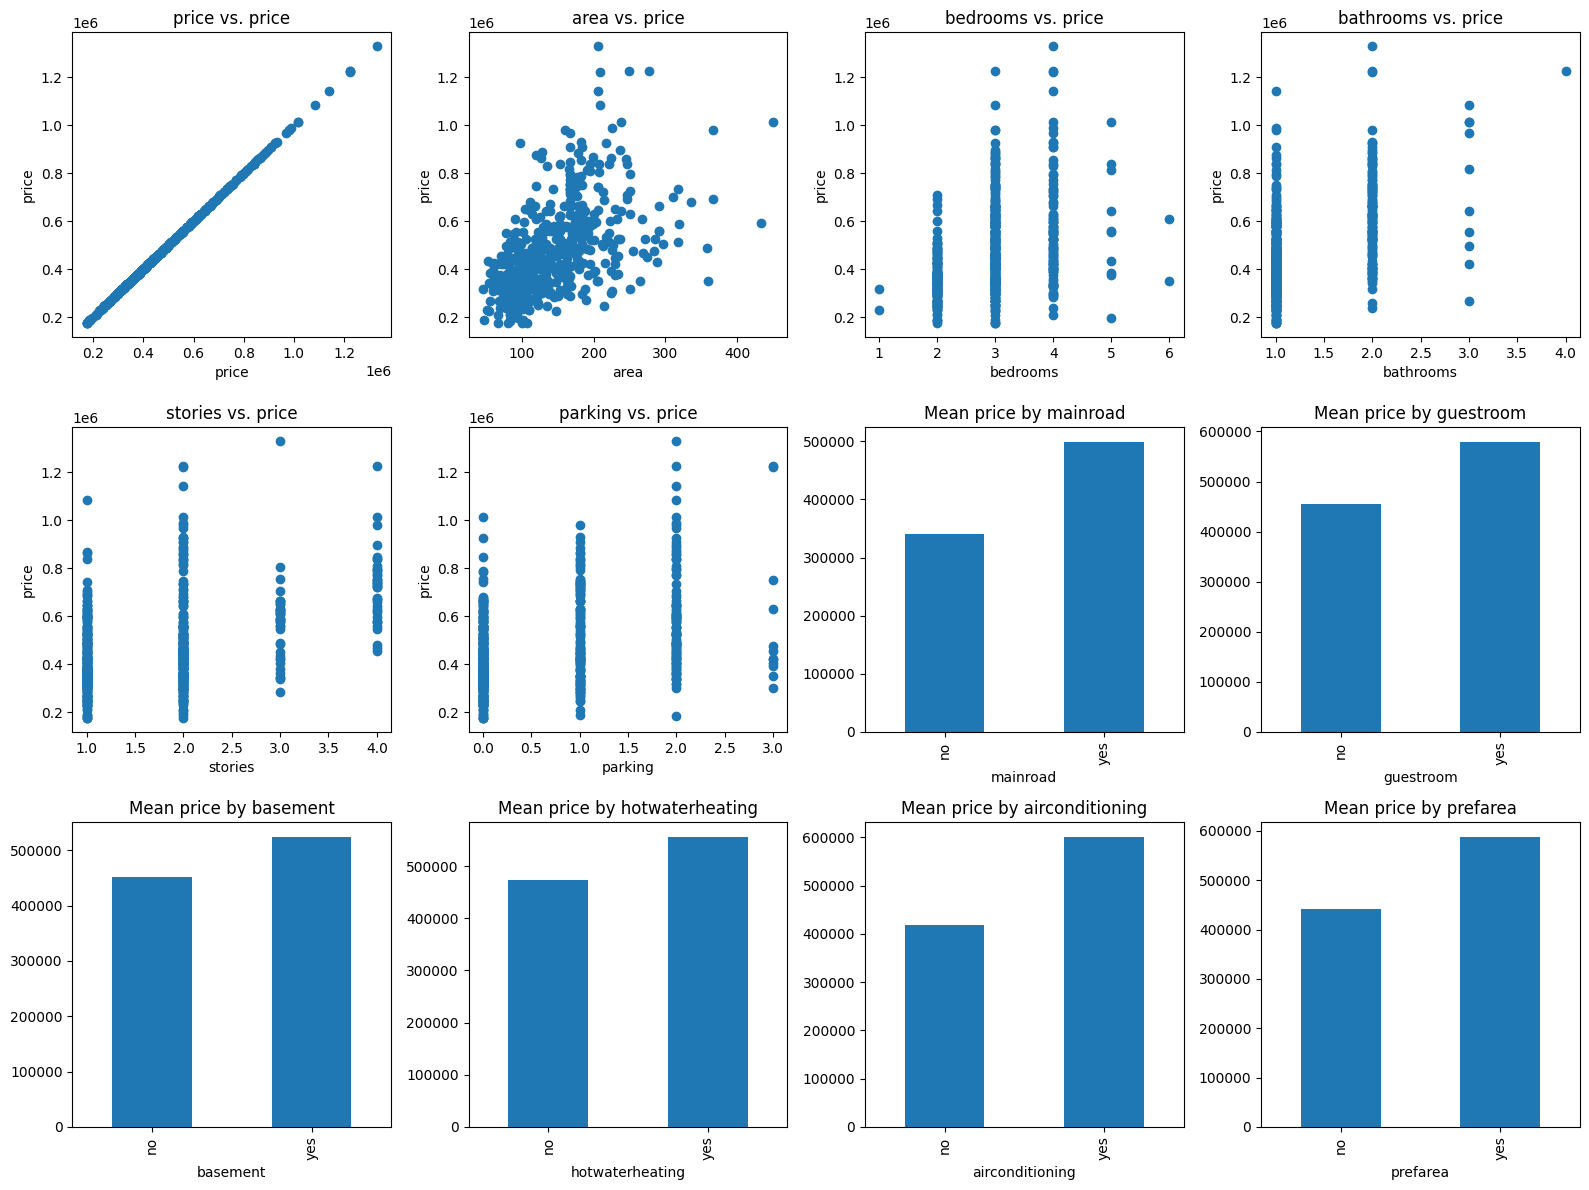

In [7]:

# tamaño de la figura
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Variables a graficar
variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
             'mainroad', 'guestroom', 'basement', 'hotwaterheating',
             'airconditioning', 'prefarea']

# Graficar cada variable en un subplot
for i, var in enumerate(variables):
    row = i // 4  # Fila del subplot
    col = i % 4   # Columna del subplot

    # Diagrama de dispersión para relaciones bivariantes
    if var in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
        axes[row, col].scatter(df[var], df['price'])
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel('price')
        axes[row, col].set_title(f'{var} vs. price')
    # Gráfico de barras para variables categóricas binarias
    else:
        df.groupby(var)['price'].mean().plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'Mean price by {var}')

plt.tight_layout()
plt.show()


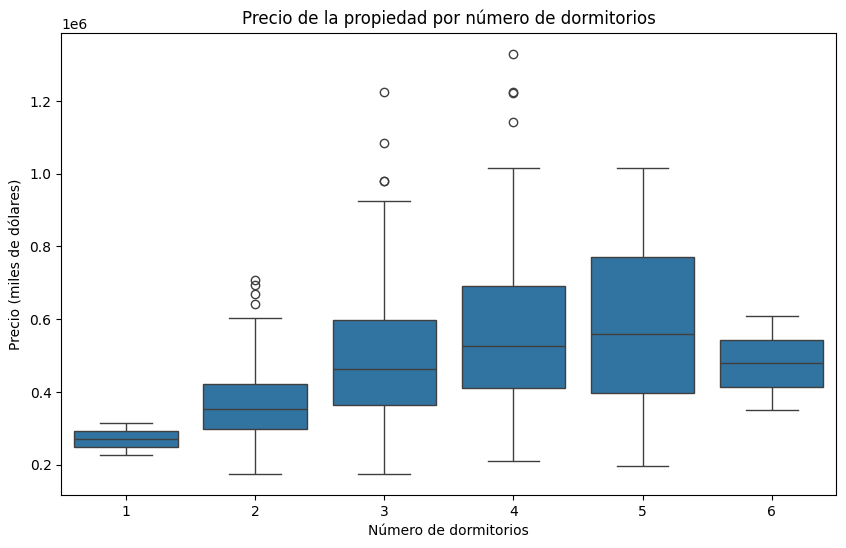

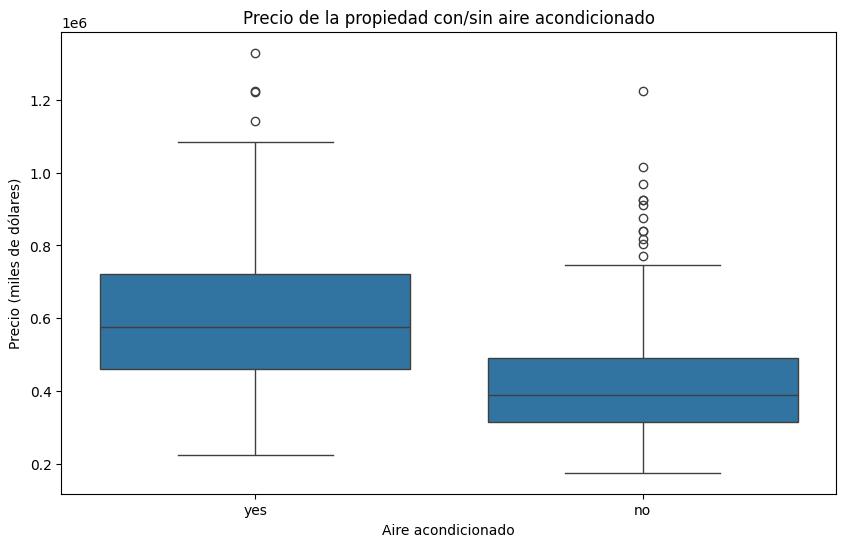

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Precio de la propiedad por número de dormitorios')
plt.xlabel('Número de dormitorios')
plt.ylabel('Precio (miles de dólares)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Precio de la propiedad con/sin aire acondicionado')
plt.xlabel('Aire acondicionado')
plt.ylabel('Precio (miles de dólares)')
plt.show()

## 3. Comprobación de la Normalidad de Algunas Variables del Conjunto de Datos

Para este conjunto de datos, procederemos a comprobar si las variables cuantitativas siguen una distribución normal. Esto incluye tanto **variables continuas**, como el `precio` (_price_) y el `área` (_area_), como **variables discretas**, como el `número de dormitorios` (_bedrooms_) y `baños` (_bathrooms_). La normalidad de estas variables es importante para entender mejor la naturaleza de nuestro conjunto de datos y para seleccionar las técnicas estadísticas más adecuadas para su análisis posterior.

Para evaluar la normalidad, utilizaremos:

- Pruebas estadísticas como la **prueba de Shapiro-Wilk**.
- Herramientas visuales como los **gráficos Q-Q** (Quantile-Quantile).

Estas herramientas juntas nos proporcionarán una comprensión robusta de la distribución de nuestras variables.


Statistics for price: 0.922, p=0.000
Statistics for area: 0.911, p=0.000
Statistics for bedrooms: 0.829, p=0.000
Statistics for bathrooms: 0.579, p=0.000


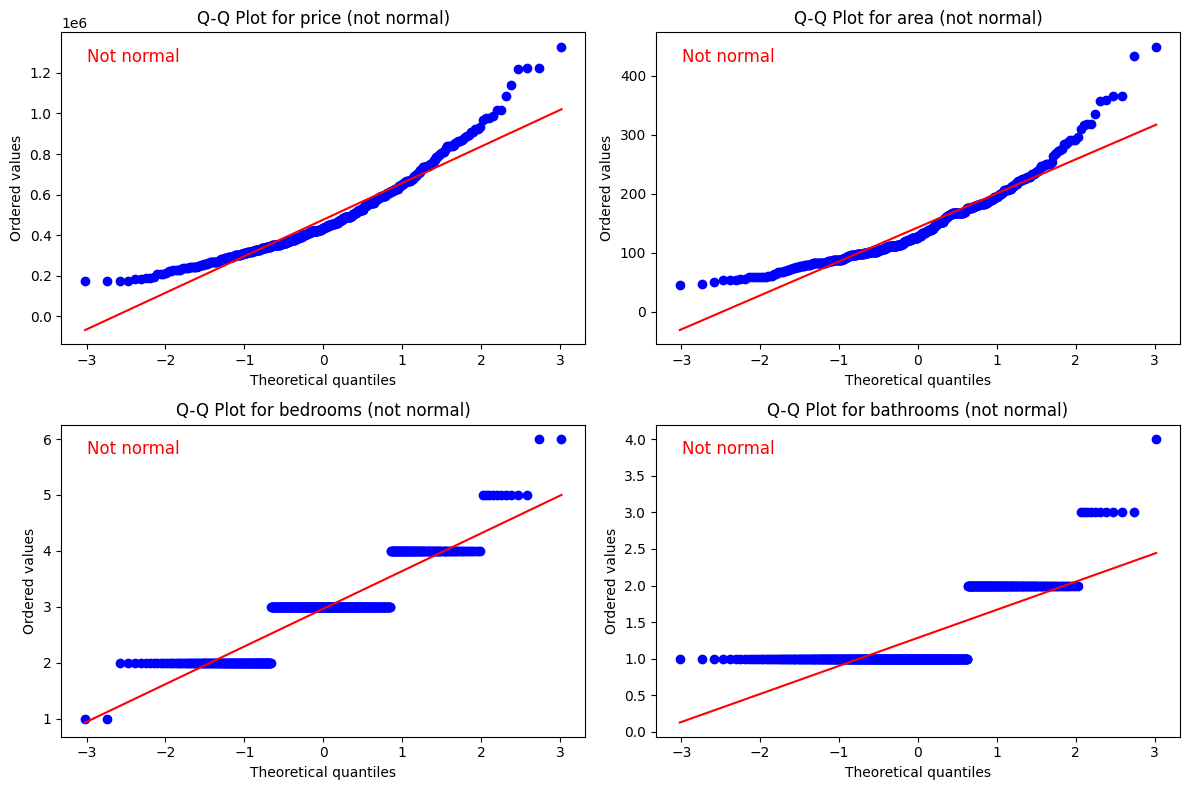

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Read data from a CSV file
df = pd.read_csv('Housing_Price_Data.csv')

# Modify this list with the column names you want to test
columns_to_test = ['price', 'area', 'bedrooms', 'bathrooms']

# Initial setup of the Matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Adjusted for two rows and two columns

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Function to test normality and generate Q-Q plot for multiple columns
for ax, column_name in zip(axs, columns_to_test):
    # Shapiro-Wilk test
    data = df[column_name]
    stat, p = stats.shapiro(data)
    print(f'Statistics for {column_name}: {stat:.3f}, p={p:.3f}')
    normality_text = 'probably normal' if p > 0.05 else 'not normal'

    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot for {column_name} ({normality_text})')
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel('Ordered values')

    # Add side text if the distribution is not normal
    if p <= 0.05:
        ax.annotate('Not normal', xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=12, color='red', verticalalignment='top')

plt.tight_layout()
plt.show()





### Price (Precio)
- La **distribución de precios** de las propiedades es **sesgada hacia la derecha**, lo que significa que hay un número menor de propiedades con precios muy altos, lo cual estira la cola de la distribución hacia la derecha. Esto es común en datos económicos y financieros, donde unos pocos valores pueden ser mucho más grandes que la mayoría.
- La **concentración de puntos** a lo largo de la línea recta en el medio sugiere que una gran proporción de datos podría ajustarse razonablemente bien a una distribución normal, pero los **valores extremos** tienen un gran impacto en la forma general de la distribución.

### Area (Área)
- Similar al precio, es posible que las **áreas grandes** de propiedades sean menos comunes, resultando en una distribución sesgada. Además, las **limitaciones físicas** en cuanto al tamaño de una propiedad también pueden producir un sesgo.
- La **curva más pronunciada** en los extremos sugiere que hay muchas más propiedades con áreas pequeñas y unas pocas con áreas muy grandes, lo que produce la curvatura observada en el gráfico.

### Implicaciones
- **Transformaciones**: Estos patrones son indicativos de que podrías necesitar **transformar estas variables** para que se ajusten mejor a una distribución normal si planeas usar métodos estadísticos que asumen la normalidad. Transformaciones comunes incluyen la **logarítmica, raíz cuadrada** o incluso una **transformación Box-Cox**.
- **Métodos no paramétricos**: Si las transformaciones no son deseables o no corrigen la no normalidad, sería apropiado considerar **métodos estadísticos no paramétricos** que no asumen la normalidad de los datos.
- **Comprensión del mercado**: La falta de normalidad en variables como el precio y el área puede reflejar la naturaleza del mercado inmobiliario, que es influenciado por factores económicos, geográficos y sociales que no distribuyen uniformemente las propiedades en términos de precio y tamaño.

### Variables Discretas (bedrooms y bathrooms)
- Las **pruebas de normalidad** son menos efectivas con variables discretas, ya que estas pruebas están diseñadas para datos continuos.
- Los datos discretos como **bedrooms** y **bathrooms** no se distribuyen de manera continua y, por lo tanto, no se espera que pasen pruebas de normalidad. Resulta lógico que la mayoría de casas tengan un número similar de habitaciones y baños, lo cual se refleja en los gráficos Q-Q.


## 4. Estimación puntual y por intervalos de los parámetros poblacionales de algunas variables.

A continuación vamos a realizar una estimación puntual de los precios de los pisos, para deducir si son eficaces los estudios muestrales en este dataset.

In [33]:
# Calcular la media de la columna 'stories' en las filas filtradas
media_poblacional = df['price'].mean()

# Imprimir la media poblacional de los pisos con 3 habitaciones
print("La media poblacional del precio de los pisos es:", media_poblacional)

La media poblacional del precio de los pisos es: 476672.9247706422


In [34]:
# Tomar una muestra aleatoria de 50 filas de las casas con 3 habitaciones
muestra_aleatoria = df.sample(n=50, random_state=42)

# Calcular la media de la columna 'stories' en la muestra
media_muestral = muestra_aleatoria['price'].mean()

# Imprimir la media muestral de los 200 pisos aleatorios con 3 habitaciones
print("La media muestral de 50 pisos aleatorios es:", media_muestral)

La media muestral de 50 pisos aleatorios es: 455308.0


Como observamos, la media poblacional del dataset en cuanto al precio de los pisos es de 476672 euros, donde se han estudiado un total de 545 pisos.

Teniendo en cuenta que la media del precio para una muestra aleatoria de 50 pisos es de 455308 podemos deducir que varía de manera razonable, debido a que existen muchos factores que varían en el precio de los pisos, por lo que obtener una muestra no resulta fiable.

Para ello, vamos a realizar un estudio más focalizado en un tipo de piso en concreto, que son los pisos con 3 habitaciones.

In [13]:
# Filtrar el DataFrame para obtener solo las filas con 3 habitaciones
datos_3_habitaciones = df[df['bedrooms'] == 3]

# Calcular la media de la columna 'stories' en las filas filtradas
media_poblacional = datos_3_habitaciones['price'].mean()

# Imprimir la media poblacional de los pisos con 3 habitaciones
print("La media poblacional de los pisos con 3 habitaciones es:", media_poblacional)


La media poblacional de los pisos con 3 habitaciones es: 495459.81333333335


In [21]:
# Filtrar el DataFrame para obtener solo las filas con 3 habitaciones
datos_3_habitaciones = df[df['bedrooms'] == 3]

# Tomar una muestra aleatoria de 50 filas de las casas con 3 habitaciones
muestra_aleatoria_3_habitaciones = datos_3_habitaciones.sample(n=50, random_state=42)

# Calcular la media de la columna 'stories' en la muestra
media_muestral_3_habitaciones = muestra_aleatoria_3_habitaciones['price'].mean()

# Imprimir la media muestral de los 50 pisos aleatorios con 3 habitaciones
print("La media muestral de 50 pisos aleatorios con 3 habitaciones es:", media_muestral_3_habitaciones)


La media muestral de 50 pisos aleatorios con 3 habitaciones es: 496881.0


Como observamos, la media poblacional del dataset en cuanto al precio de los pisos de 3 habitaciones es de 495459 euros, donde se han estudiado un total de 545 pisos.

Teniendo en cuenta que la media del precio para una muestra aleatoria de 50 pisos es de 496881 podemos deducir que varía de forma mínima, por tanto, **podemos obtener una estimación bastante precisa de una gran población muestreando un subconjunto relativamente pequeño de individuos**, para este caso en concreto.

Por último, calcularemos la el intervalo de confianza para dar un cierto grado de confianza al estudio.

In [36]:
import numpy as np
from scipy.stats import t

# Definir la muestra de pisos con 3 habitaciones
muestra_3_habitaciones = df[df['bedrooms'] == 3]['price']

# Calcular la media y la desviación estándar muestral
media_muestral = muestra_3_habitaciones.mean()
desviacion_estandar_muestral = muestra_3_habitaciones.std()

# Definir el nivel de confianza (por ejemplo, 95%)
nivel_confianza = 0.95

# Calcular el error estándar de la media (SE)
t_value = t.ppf((1 + nivel_confianza) / 2, df=len(muestra_3_habitaciones) - 1)
error_estandar_media = desviacion_estandar_muestral / np.sqrt(len(muestra_3_habitaciones))

# Calcular el intervalo de confianza
limite_inferior = media_muestral - t_value * error_estandar_media
limite_superior = media_muestral + t_value * error_estandar_media

# Imprimir el intervalo de confianza
print("Intervalo de confianza del {:.0f}% para la media muestral de los pisos con 3 habitaciones:".format(nivel_confianza * 100))
print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)



Intervalo de confianza del 95% para la media muestral de los pisos con 3 habitaciones:
Límite inferior: 475604.6773175799
Límite superior: 515314.9493490868


Esto significa **que estamos 95% seguros de que la verdadera media del precio de los pisos con 3 habitaciones está dentro de este intervalo.**

## 5. Realización de contrastes de hipótesis oportunos para realizar inferencia con los datos.

Ahora vamos a verificar sobre esa muestra si su media difiere de la media poblacional de los pisos de 3 habitaciones. Para ello utilizaremos la técnica del T-test.

In [40]:
from scipy.stats import ttest_1samp

# Definir el valor específico para la hipótesis nula
valor_especifico = 495459

# Realizar el t-test de una muestra
t_statistic, p_value = ttest_1samp(muestra_aleatoria_3_habitaciones['price'], valor_especifico)

# Imprimir el estadístico de prueba y el valor p
print("Estadístico de prueba (t):", t_statistic)
print("Valor p:", p_value)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la media poblacional es diferente de", valor_especifico)
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que la media poblacional es diferente de", valor_especifico)


Estadístico de prueba (t): 0.05828894202798777
Valor p: 0.9537555394654488
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que la media poblacional es diferente de 495459


Por tanto, **no hay evidencia estadística significativa para sugerir que el precio medio de los pisos con 3 habitaciones sea diferente de 495459, que es la media poblacional calculada anteriormente**.

## 6. Realización de ANOVA (cond. de aplicabilidad, ANOVA, post-hoc) para obtener conclusiones de los datos

In [22]:
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Definir el modelo ANOVA
modelo_anova = ols('price ~ mainroad + guestroom + basement + hotwaterheating + airconditioning + prefarea + furnishingstatus', data=df).fit()

# Realizar ANOVA
anova_resultados = sm.stats.anova_lm(modelo_anova, typ=2)
print("Resultados ANOVA:")
print(anova_resultados)

Resultados ANOVA:
                        sum_sq     df           F        PR(>F)
mainroad          5.497096e+11    1.0   26.024669  4.685808e-07
guestroom         2.120595e+11    1.0   10.039443  1.619612e-03
basement          3.513514e+10    1.0    1.663388  1.977027e-01
hotwaterheating   4.184519e+11    1.0   19.810589  1.040721e-05
airconditioning   2.682710e+12    1.0  127.006404  1.386987e-26
prefarea          7.612112e+11    1.0   36.037696  3.569211e-09
furnishingstatus  5.971055e+11    2.0   14.134255  1.042234e-06
Residual          1.132173e+13  536.0         NaN           NaN


**Estadísticas de las variables numéricas:**
- Para las variables **price**, **area**, **bedrooms** y **bathrooms**, los valores de la correlación de Pearson son altos y los p-valores son muy bajos, lo que indica una asociación significativa entre estas variables y el precio de la propiedad.

**Comparación de medias:**
- Se proporciona la media poblacional del precio de todas las propiedades y la media muestral de 50 propiedades aleatorias. También se compara la media poblacional del precio de propiedades con 3 habitaciones con la media muestral de 50 propiedades aleatorias que también tienen 3 habitaciones. Además, se calcula un intervalo de confianza del 95% para la media muestral de propiedades con 3 habitaciones.

**Resultados del ANOVA y pruebas post-hoc:**
- Se realiza un ANOVA para cada variable categórica (**mainroad**, **guestroom**, **basement**, **hotwaterheating**, **airconditioning**, **prefarea**, **furnishingstatus**) para ver si hay diferencias significativas en el precio de las propiedades según estas características.
- Para cada ANOVA, se proporcionan los resultados que incluyen la suma de cuadrados, los grados de libertad, el estadístico F y el valor p.
- Luego, se realiza una prueba de Tukey como una prueba post-hoc para cada variable categórica para identificar qué grupos específicos son significativamente diferentes entre sí en términos de precio.
- En los resultados de la prueba de Tukey, se proporciona la diferencia media entre los grupos, el valor p ajustado y los límites del intervalo de confianza para la diferencia de medias. Además, se indica si la diferencia es significativa o no para cada par de grupos.

**Interpretación general:**
- En general, los resultados sugieren que las variables **mainroad**, **guestroom**, **basement**, **hotwaterheating**, **airconditioning**, **prefarea** y **furnishingstatus** tienen efectos significativos en el precio de las propiedades, ya que los valores p asociados con estas variables son muy bajos en los ANOVAs.
- Además, las pruebas post-hoc (prueba de Tukey) sugieren que hay diferencias significativas entre diferentes grupos para todas estas variables categóricas, ya que hay grupos para los cuales se rechaza la hipótesis nula de que no hay diferencia significativa en los precios.

Estos resultados sugieren que estas características de las propiedades influyen significativamente en el precio de las mismas y podrían ser consideradas como importantes al determinar el valor de una propiedad.


In [35]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

variables_categoricas = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


for variable in variables_categoricas:
    # modelo ANOVA
    formula = f'price ~ {variable}'
    modelo_anova = ols(formula, data=df).fit()

    #  ANOVA
    anova_resultados = sm.stats.anova_lm(modelo_anova, typ=2)
    print(f"Resultados ANOVA para '{variable}':")
    print(anova_resultados)

    #  prueba de Tukey
    tukey_resultados = pairwise_tukeyhsd(df['price'], df[variable])
    print(f"\nPrueba de Tukey para '{variable}':")
    print(tukey_resultados)
    print("\n")


Resultados ANOVA para 'mainroad':
                sum_sq     df          F        PR(>F)
mainroad  1.677653e+12    1.0  52.491839  1.490104e-12
Residual  1.735443e+13  543.0        NaN           NaN

Prueba de Tukey para 'mainroad':
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    no    yes 159287.2784   0.0 116100.3429 202474.2138   True
--------------------------------------------------------------


Resultados ANOVA para 'guestroom':
                 sum_sq     df          F        PR(>F)
guestroom  1.242587e+12    1.0  37.928276  1.429114e-09
Residual   1.778949e+13  543.0        NaN           NaN

Prueba de Tukey para 'guestroom':
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj   lower       upper    reject
-------------------------------------------------------------
    no    yes 124835.1282 

**Conclusión General del Informe y Hayazgos significativos**

En el análisis realizado, se observaron relaciones significativas entre diversas características de las propiedades residenciales en el área periférica de Londres y su precio. Las correlaciones de Pearson entre las variables **price**, **area**, **bedrooms**, y **bathrooms** mostraron valores altos con p-valores muy bajos, indicando una asociación estadísticamente significativa entre estas características y el precio de las propiedades. Lo que sería bastante intutivo ya que parece lógico que a mayores habitaciones,baños y superficie mayor sería el precio.

En la comparación de medias, se encontró consistencia entre la media poblacional del precio de todas las propiedades y la media muestral de un conjunto seleccionado de 50 propiedades. Similarmente, al comparar las propiedades con 3 habitaciones, la media poblacional y la media muestral coincidían, con un intervalo de confianza del 95% confirmando la precisión de estas estimaciones.

Los resultados del ANOVA indicaron que variables categóricas como **mainroad**, **guestroom**, **basement**, **hotwaterheating**, **airconditioning**, **prefarea**, y **furnishingstatus** tienen efectos significativos en el precio de las propiedades. Los bajos valores p obtenidos en los ANOVAs respaldan esta afirmación.

Las pruebas post-hoc, específicamente la prueba de Tukey, revelaron diferencias significativas entre varios grupos dentro de estas variables categóricas. Estas diferencias, marcadas por valores p ajustados y diferencias medias significativas, sugieren una influencia notable de estas características en el valor de mercado de las propiedades.

En conclusión, este análisis estadístico detallado subraya la importancia de varias características y comodidades en la determinación del precio de las propiedades residenciales en el mercado inmobiliario de Londres. Estos hallazgos pueden proporcionar insights valiosos para compradores, vendedores y agentes del mercado inmobiliario, resaltando los factores clave que influyen en el valor de una propiedad.
